In [1]:
%load_ext autoreload
%autoreload 2
import counterfeit_utils as cfu
import sys
sys.path.append("..")
import psql_methods as psql
import torch
import torch_geometric
import numpy as np
import feature_extract
import pandas as pd
import pickle
import feature_utils as feat

In [2]:
command = ["Select distinct slug from overlap_counts"]
slugs = psql.execute_commands(command)
slugs = [x[0] for x in slugs]
overlaps = cfu.overlaps_from_db(slugs[0])

In [6]:
overlaps[0]

(0, 6, '0xzuki')

In [3]:
pw_dists = pd.read_pickle('pw_dists_counterfeit.pkl')

In [2]:
with open('top_100_pfps.txt', 'r') as f:
    pfps = f.read().splitlines()
pfps

['boredapeyachtclub',
 'cryptopunks',
 'mutant-ape-yacht-club',
 'azuki',
 'clonex',
 'wrapped-cryptopunks',
 'proof-moonbirds',
 'doodles-official',
 'bored-ape-kennel-club',
 'pudgypenguins',
 'meebits',
 'beanzofficial',
 'cool-cats-nft',
 'milady',
 '0n1-force',
 'world-of-women-nft',
 'thecaptainz',
 'mfers',
 'veefriends',
 'goblintownwtf',
 'hapeprime',
 'invisiblefriends',
 'mekaverse',
 'thepotatoz',
 'murakami-flowers-seed',
 'fluf',
 'pxnghostdivision',
 'karafuru',
 'genesis-creepz',
 'nakamigos',
 'lilpudgys',
 'hashmasks',
 'moonbirds-oddities',
 'official-v1-punks',
 'cyberbrokers',
 '3landers',
 'phantabear',
 'rektguy',
 'cyberkongz-vx',
 'sappy-seals',
 'veefriends-series-2',
 'kaiju-kingz',
 'lazy-lions',
 'world-of-women-galaxy',
 'metahero-mintpass',
 'coolpetsnft',
 'alienfrensnft',
 'primeapeplanetpap',
 'the-doge-pound',
 'digidaigaku',
 'cyberkongz',
 'guttercatgang',
 'murakami-flowers-2022-official',
 'coolmans-universe',
 'degentoonz-collection',
 'capsuleho

In [5]:
# delete beanz

In [5]:
der_list_slugs = set([elm[0] for elm in cfu.get_der_list_db()])
der_list_slugs

{'3',
 'azuki',
 'beanzofficial',
 'bored-ape-kennel-club',
 'boredapeyachtclub',
 'clonex',
 'cool-cats-nft',
 'cryptopunks',
 'cyberkongz-vx',
 'fluf',
 'genesis-creepz',
 'goblintownwtf',
 'hapeprime',
 'invisiblefriends',
 'kaiju-kingz',
 'karafuru',
 'lazy-lions',
 'lilpudgys',
 'mekaverse',
 'milady',
 'nakamigos',
 'phantabear',
 'proof-moonbirds',
 'pudgypenguins',
 'pxnghostdivision',
 'rektguy',
 'sappy-seals',
 'thecaptainz',
 'veefriends',
 'veefriends-series-2',
 'world-of-women-galaxy',
 'world-of-women-nft'}

In [22]:
c_list_slugs = set([elm[0] for elm in cfu.get_counterfeit_db() if elm[1] >= 20])
c_list_slugs

{'0n1-force',
 'azuki',
 'beanzofficial',
 'boredapeyachtclub',
 'cool-cats-nft',
 'cryptopunks',
 'cyberkongz',
 'doodles-official',
 'fluf',
 'genesis-creepz',
 'goblintownwtf',
 'hapeprime',
 'invisiblefriends',
 'kaiju-kingz',
 'karafuru',
 'mekaverse',
 'mfers',
 'milady',
 'nakamigos',
 'proof-moonbirds',
 'pudgypenguins',
 'sappy-seals',
 'world-of-women-nft'}

In [23]:
c_list_slugs - der_list_slugs

{'0n1-force', 'cyberkongz', 'doodles-official', 'mfers'}

In [25]:
cfu.make_overlap_scatter('mfers', der_list=[])

[('0xmfers', 1, 189), ('grindermfers', 2, 48), ('mphers', 3, 659), ('mfersimpson', 4, 103), ('mferchicks', 5, 454), ('pet-mfers', 6, 8), ('ninjamfers', 7, 7), ('mfers-doin-stuff-standing', 8, 336), ('thekevinmfers', 9, 46), ('dead-mfers', 10, 405), ('smowlmfer', 11, 58), ('chrome-void-frogs', 12, 162), ('ape-mfers', 13, 562), ('pepefers', 14, 18), ('pooly-pfers', 15, 282), ('cc0fighters', 16, 183), ('derpyapemfers', 17, 172), ('fuckinggoodtyke', 18, 4), ('mfers-elementals', 19, 44), ('nimrodz', 20, 31), ('mferbots', 21, 342), ('mferdickbutts', 22, 397), ('mfn-gutter-punks', 23, 4590), ('downbad', 24, 11), ('amfers', 25, 379), ('marto-bears-editions', 26, 218), ('azuki-mfer', 27, 315), ('milady-mfers', 29, 33), ('baby-obey', 30, 0), ('gutter-punks', 31, 176), ('fridgefame', 32, 23), ('cryptoninjapartners-v2', 33, 74), ('sippys', 34, 7), ('kampoeng-official', 35, 21), ('humankind-collectibles', 36, 215), ('capturedngmis', 37, 78), ('xmfers', 38, 873), ('we-are-flowers', 39, 29), ('goblin

                                slug  sorted_order  row_count
2321                   cyberkongz-vx          6641       9734
9424                    thememes6529          4343       5643
2080                        creyzies          5998       5326
5829                mfn-gutter-punks            23       4590
6288                       nakamigos          4793       4548
3088                 end-of-sartoshi          9020       3052
633                       art-blocks          7266       2715
2200                   cryptokitties          4896       2534
3962   girls-robots-dragons-official          6397       2359
1010                   beanzofficial            89       1960
802                  azukielementals          3217       1666
6927                      pablos-lol           811       1625
6444                        nftboxes          8549       1410
10579    zogz-editions-by-matt-furie          3383       1400
7669                       raremfers            66       1378
8679    

In [24]:
cfu.der_list_to_db('doodles-official', ['the-dooplicator', 'genesis-box'])

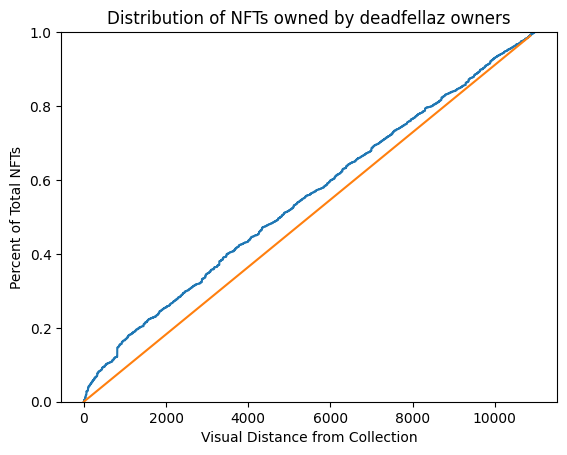

count    87033.000000
mean      4946.960842
std       3319.336654
min          0.000000
0.1%         5.000000
1%          29.000000
10%        542.000000
25%       1921.000000
50%       4790.000000
75%       7825.000000
max      10972.000000
dtype: float64


In [32]:
cfu.make_overlap_cdf(pw_dists,slugs[0],der_list = der_list,count_to_overlap=overlaps)